<a href="https://colab.research.google.com/github/harshita0212/CrypticGenerator/blob/main/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')


In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X=pd.concat([X,geography,gender],axis=1)

In [16]:
##splitting the dataset in train-test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test

array([[ 5.97000000e+02,  3.50000000e+01,  8.00000000e+00, ...,
         1.00000000e+00, -7.10542736e-18, -4.17443857e-17],
       [ 5.23000000e+02,  4.00000000e+01,  2.00000000e+00, ...,
         5.77315973e-17, -7.10542736e-18, -4.17443857e-17],
       [ 7.06000000e+02,  4.20000000e+01,  8.00000000e+00, ...,
         5.77315973e-17,  1.00000000e+00, -4.17443857e-17],
       ...,
       [ 5.78000000e+02,  3.60000000e+01,  1.00000000e+00, ...,
         5.77315973e-17,  1.00000000e+00,  1.00000000e+00],
       [ 6.50000000e+02,  3.40000000e+01,  4.00000000e+00, ...,
         1.00000000e+00, -7.10542736e-18,  1.00000000e+00],
       [ 5.73000000e+02,  3.00000000e+01,  8.00000000e+00, ...,
         1.00000000e+00, -7.10542736e-18,  1.00000000e+00]])

In [21]:
X_train.shape

(8000, 11)

In [22]:
## create the ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [23]:
## initialize the ann
classifier=Sequential()


In [25]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [26]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [27]:
classifier.add(Dense(units=6,activation='relu'))

In [29]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [30]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [35]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [36]:
#train the model

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3103 - accuracy: 0.8787 - val_loss: 0.3766 - val_accuracy: 0.8436
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.8783 - val_loss: 0.3779 - val_accuracy: 0.8455
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3100 - accuracy: 0.8780 - val_loss: 0.3742 - val_accuracy: 0.8493
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3103 - accuracy: 0.8798 - val_loss: 0.3751 - val_accuracy: 0.8485
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3101 - accuracy: 0.8798 - val_loss: 0.3753 - val_accuracy: 0.8459
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3089 - accuracy: 0.8806 - val_loss: 0.3762 - val_accuracy: 0.8493
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3076 - accuracy: 0.8800 - val_loss: 0.3791 - val_accuracy:

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

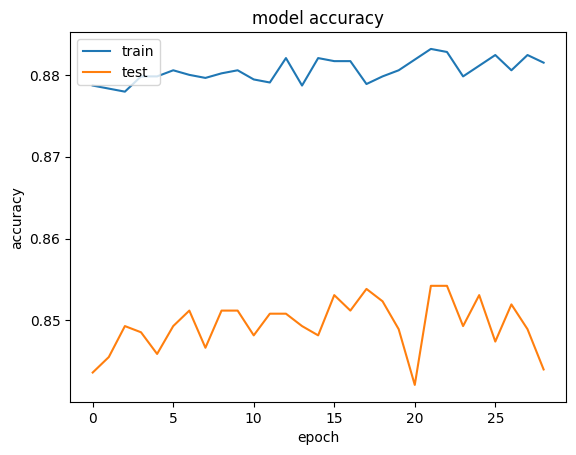

In [38]:
#summarise history for accurcay
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 1s 7ms/step


In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1230,  365],
       [ 295,  110]])

In [42]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [43]:
score

0.67

In [44]:
##get weights

classifier.get_weights()

[array([[-1.71361536e-01,  2.21153237e-02, -1.56628132e-01,
          1.00660622e+00, -2.28484482e-01,  5.91746047e-02,
         -2.38527030e-01, -2.96606392e-01, -2.04949677e-01,
          5.15174977e-02, -1.33634051e-02],
        [ 5.59277952e-01,  5.84164448e-02,  5.89711182e-02,
         -1.18373287e+00, -9.28250968e-01,  5.32139599e-01,
          1.25118601e+00, -3.74548316e-01, -2.68635660e-01,
         -2.35950023e-01, -5.65719724e-01],
        [ 2.52691865e-01,  3.48762795e-02,  7.57323503e-01,
          9.55471098e-02, -2.24320963e-01,  1.70315534e-01,
          1.12858554e-02,  2.30760738e-01,  1.25193477e-01,
          3.46242547e-01, -2.61071593e-01],
        [-9.31572616e-02,  4.40485954e-01,  4.20311391e-01,
          3.06176782e-01,  1.09704643e-01,  1.75393119e-01,
          1.19280934e-01, -6.44536972e-01, -1.01109004e+00,
          7.53231704e-01,  1.64015502e-01],
        [-4.88336653e-01,  1.13830006e+00, -1.90535918e-01,
          2.29919448e-01,  7.61035860e-01,  